## Preprocessing

In [31]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

# Variables
model_results = []

import warnings
warnings.filterwarnings('ignore')  # Ignore all warnings

In [32]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.head(5)


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [33]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [34]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
counts = application_df["APPLICATION_TYPE"].value_counts()
counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [35]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = counts[counts<500].index.tolist()


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [36]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
counts = application_df["CLASSIFICATION"].value_counts()
counts


CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [37]:
# You may find it helpful to look at CLASSIFICATION value counts >1
counts[counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [38]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = counts[counts < 1500].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [39]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_columns = application_df.select_dtypes(include=['object']).columns
application_df = pd.get_dummies(application_df, columns=categorical_columns)
application_df.head(5)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [40]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

## Base Model
Model based on starter code outputs.

In [42]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_base = tf.keras.models.Sequential()

# First hidden layer
nn_base.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_base.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_base.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_base.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Compile the model
nn_base.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
base_model = nn_base.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.6996 - loss: 0.5940
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7343 - loss: 0.5493
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.7298 - loss: 0.5532
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.7305 - loss: 0.5514
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7331 - loss: 0.5436
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.7342 - loss: 0.5454
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.7312 - loss: 0.5484
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.7288 - loss: 0.5481
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7314 - loss: 0.5509
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step - accuracy: 0.7298 - loss: 0.5465
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.7386 - loss: 0.5392
Epoch 12/100
804/80

268/268 - 0s - 908us/step - accuracy: 0.7303 - loss: 0.5606
Loss: 0.5606083273887634, Accuracy: 0.7302623987197876


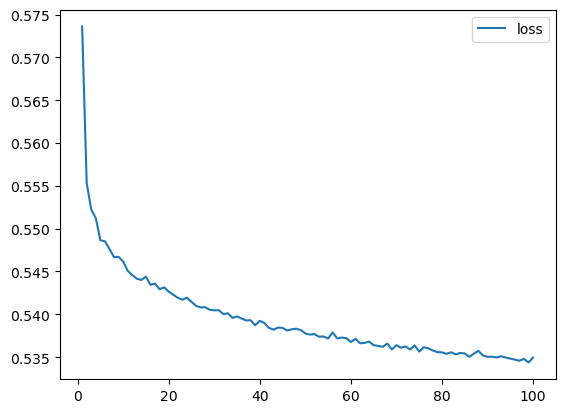

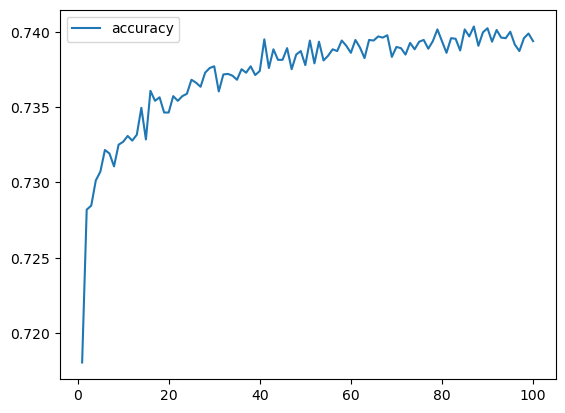

In [45]:
# Plot Results
training_df = pd.DataFrame(base_model.history, index=range(1,len(base_model.history["loss"])+1))
training_df.plot(y="loss")
training_df.plot(y="accuracy")


# Evaluate the model using the test data
model_loss, model_accuracy = nn_base.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#  Add results to a dictionary for comparison.
model_info = {
    'model_name': 'Base',
    'loss': model_loss,
    'accuracy': model_accuracy
}

model_results.append(model_info)


## Optimization Attempt 1
* **Changes:**
  * Increase number of epochs from 100 to 200


In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn_optomize_v1 = tf.keras.models.Sequential()

# First hidden layer
nn_optomize_v1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_optomize_v1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn_optomize_v1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optomize_v1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Compile the model
nn_optomize_v1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Train the model
model_optomize_v1 = nn_optomize_v1.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.6990 - loss: 0.5947
Epoch 2/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step - accuracy: 0.7236 - loss: 0.5620
Epoch 3/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.7272 - loss: 0.5529
Epoch 4/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.7354 - loss: 0.5495
Epoch 5/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 721us/step - accuracy: 0.7338 - loss: 0.5475
Epoch 6/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 674us/step - accuracy: 0.7268 - loss: 0.5508
Epoch 7/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.7332 - loss: 0.5496
Epoch 8/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.7326 - loss: 0.5470
Epoch 9/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.7328 - loss: 0.5448
Epoch 10/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7356 - loss: 0.5441
Epoch 11/200
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.7366 - loss: 0.5416
Epoch 12/200
804/804 

268/268 - 0s - 917us/step - accuracy: 0.7291 - loss: 0.5693
Loss: 0.5692536234855652, Accuracy: 0.7290962338447571


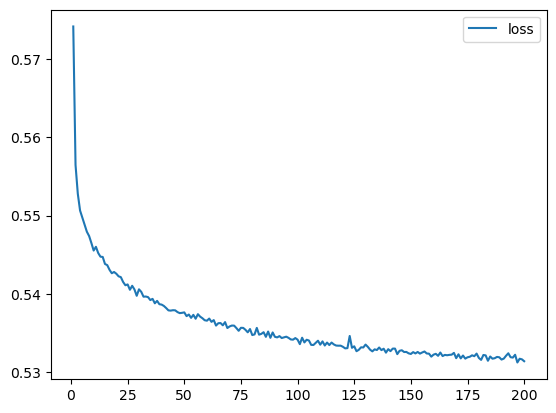

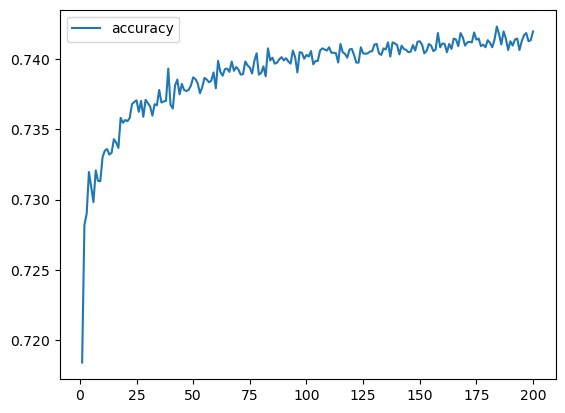

In [49]:
# Plot Results
training_df = pd.DataFrame(model_optomize_v1.history, index=range(1,len(model_optomize_v1.history["loss"])+1))
training_df.plot(y="loss")
training_df.plot(y="accuracy")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_optomize_v1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#  Add results to a dictionary for comparison.
model_info = {
    'model_name': 'Optimization Attempt 1',
    'loss': model_loss,
    'accuracy': model_accuracy
}

model_results.append(model_info)

## Optimization Attempt 2
* **Changes:**
  * Increased nodes in layer one to 3 times the number of columns in dataset.
  * Increased nodes in layer two to 1/2 the number of nodes as layer one

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  132
hidden_nodes_layer2 = 66


nn_optomize_v2 = tf.keras.models.Sequential()

# First hidden layer
nn_optomize_v2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_optomize_v2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn_optomize_v2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optomize_v2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 132)            │         5,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 66)             │         8,778 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            67 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,653 (57.24 KB)

 Trainable params: 14,653 (57.24 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
nn_optomize_v2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
model_optomize_v2 = nn_optomize_v2.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.7048 - loss: 0.5853
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7262 - loss: 0.5600
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.7280 - loss: 0.5573
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.7333 - loss: 0.5489
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7338 - loss: 0.5457
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.7289 - loss: 0.5511
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.7359 - loss: 0.5461
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step - accuracy: 0.7347 - loss: 0.5420
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7325 - loss: 0.5472
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step - accuracy: 0.7371 - loss: 0.5399
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.7386 - loss: 0.5422
Epoch 12/100
804/80

268/268 - 0s - 932us/step - accuracy: 0.7275 - loss: 0.5735
Loss: 0.5735152959823608, Accuracy: 0.7274635434150696


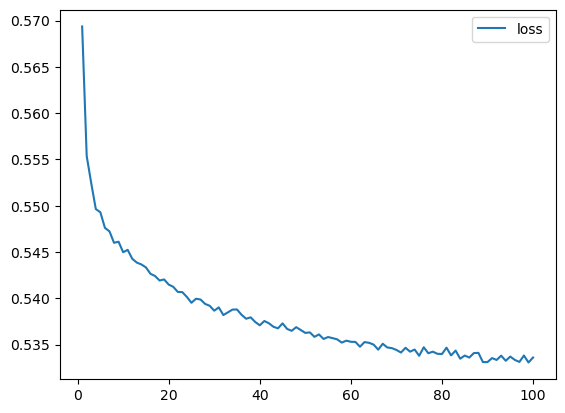

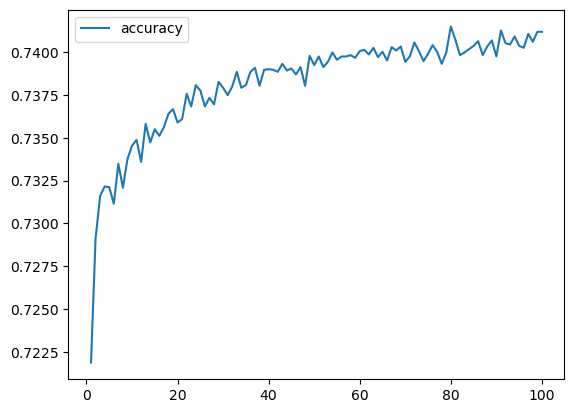

In [53]:
# Plot Results
training_df = pd.DataFrame(model_optomize_v2.history, index=range(1,len(model_optomize_v2.history["loss"])+1))
training_df.plot(y="loss")
training_df.plot(y="accuracy")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_optomize_v2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#  Add results to a dictionary for comparison.
model_info = {
    'model_name': 'Optimization Attempt 2',
    'loss': model_loss,
    'accuracy': model_accuracy
}

model_results.append(model_info)

# Optimization Attempt 3
* **Changes:**
  * Changed the number of nodes in layer one to 120
  * Changed the number of nodes in layer two to 90.
  * Added a third layer with 30 nodes.

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  120
hidden_nodes_layer2 = 90
hidden_nodes_layer3 = 30

nn_optomize_v3 = tf.keras.models.Sequential()

# First hidden layer
nn_optomize_v3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_optomize_v3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_optomize_v3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_optomize_v3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optomize_v3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 120)            │         5,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 90)             │        10,890 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │         2,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,931 (73.95 KB)

 Trainable params: 18,931 (73.95 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Compile the model
nn_optomize_v3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Train the model
model_optomize_v3 = nn_optomize_v3.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 812us/step - accuracy: 0.7197 - loss: 0.5800
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.7331 - loss: 0.5533
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.7299 - loss: 0.5564
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.7378 - loss: 0.5475
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.7324 - loss: 0.5466
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.7333 - loss: 0.5476
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 811us/step - accuracy: 0.7401 - loss: 0.5427
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.7368 - loss: 0.5393
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.7352 - loss: 0.5414
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.7407 - loss: 0.5394
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.7316 - loss: 0.5475
Epoch 12/100
804/80

268/268 - 0s - 960us/step - accuracy: 0.7298 - loss: 0.5775
Loss: 0.5775004029273987, Accuracy: 0.7297959327697754


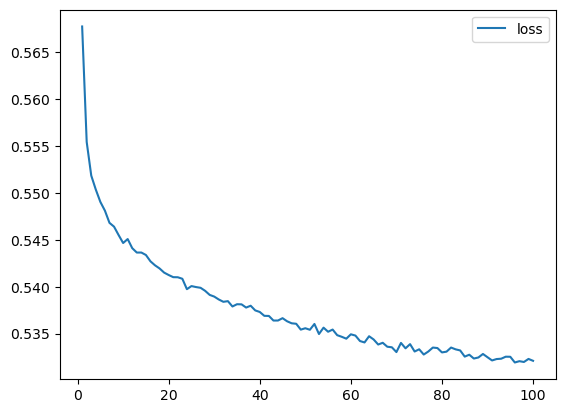

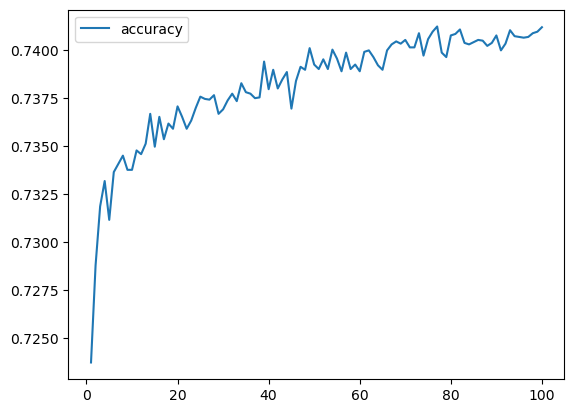

In [57]:
# Plot Results
training_df = pd.DataFrame(model_optomize_v3.history, index=range(1,len(model_optomize_v3.history["loss"])+1))
training_df.plot(y="loss")
training_df.plot(y="accuracy")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_optomize_v3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

#  Add results to a dictionary for comparison.
model_info = {
    'model_name': 'Optimization Attempt 3',
    'loss': model_loss,
    'accuracy': model_accuracy
}

model_results.append(model_info)

### KerasTuner Library
I decided to run the Keras Tuner Library to see if can improve the results and see what it suggests for model perameters.

In [65]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=43))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [66]:
# Installs keras-tuner on Google Colab
# !pip install keras-tuner

In [67]:
# Import the kerastuner library
import keras_tuner as kt

In [68]:
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    hyperband_iterations=2)

Reloading Tuner from .\untitled_project\tuner0.json


In [69]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

In [70]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 1,
 'units_0': 7,
 'units_1': 5,
 'units_2': 7,
 'units_3': 5,
 'units_4': 9,
 'units_5': 9,
 'tuner/epochs': 7,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 1,
 'tuner/round': 0}

In [71]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 1ms/step - accuracy: 0.7343 - loss: 0.5590
Loss: 0.5590378046035767, Accuracy: 0.7343440055847168


### Export Model
I output a report on the models I created with different iterations.  Based on their results, I chose *Optimization Attempt 1* as the most optimized.

In [73]:
# Display the results for my different models for comparison. 
print("================================================================================") 
print("|                              Model Results                                   |")
print("================================================================================")
print()
for result in model_results:
    print(f"{result['model_name']}: Loss: {result['loss']}, Accuracy: {result['accuracy']}")

|                              Model Results                                   |

Base: Loss: 0.5606083273887634, Accuracy: 0.7302623987197876
Optimization Attempt 1: Loss: 0.5692536234855652, Accuracy: 0.7290962338447571
Optimization Attempt 2: Loss: 0.5735152959823608, Accuracy: 0.7274635434150696
Optimization Attempt 3: Loss: 0.5775004029273987, Accuracy: 0.7297959327697754


In [59]:
# Export our model to HDF5 file
nn_optomize_v2.save("AlphabetSoupCharity_Optimization.h5")